# IDS2022 Project

In [1]:
# importing 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("clean_data.csv")

In [3]:
# data.head()
# ToimKell into 1 hour time intervsls
data["ToimKell"] = pd.to_datetime(data["ToimKell"], format='%H:%M')
data["ToimKell"] = data["ToimKell"].dt.hour
data.head()

,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik
0,2021-12-31,23,Reede,PISIVARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Mustamäe linnaosa,6586000-6586499,538500-538999,VT
1,2021-12-31,18,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Nõmme linnaosa,6583500-6583999,540500-540999,KT
2,2021-12-31,18,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Nõmme linnaosa,6583500-6583999,540500-540999,KT
3,2021-12-31,16,Reede,VARGUS,0-499,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,542500-542999,KT
4,2021-12-31,15,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Lasnamäe linnaosa,6589500-6589999,548500-548999,KT


In [4]:
# ToimKpv to separate year, month and date
data["ToimKpv"] = pd.to_datetime(data["ToimKpv"])
data['Aasta'] = pd.to_datetime(data["ToimKpv"]).dt.year
data['Kuu'] = pd.to_datetime(data["ToimKpv"]).dt.month
data['Kuupaev'] = pd.to_datetime(data["ToimKpv"]).dt.day
data.head()

,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,Aasta,Kuu,Kuupaev
0,2021-12-31,23,Reede,PISIVARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Mustamäe linnaosa,6586000-6586499,538500-538999,VT,2021,12,31
1,2021-12-31,18,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Nõmme linnaosa,6583500-6583999,540500-540999,KT,2021,12,31
2,2021-12-31,18,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Nõmme linnaosa,6583500-6583999,540500-540999,KT,2021,12,31
3,2021-12-31,16,Reede,VARGUS,0-499,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,542500-542999,KT,2021,12,31
4,2021-12-31,15,Reede,VARGUS,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Lasnamäe linnaosa,6589500-6589999,548500-548999,KT,2021,12,31


In [5]:
# KohtLiik remove "AVALIK_KOHT"  (except when it's the only value)
data['KohtLiik'] = data['KohtLiik'].str.replace('AVALIK_KOHT,', '')
data['KohtLiik'] = data['KohtLiik'].str.replace('AVALIK_KOHT', '')
data['KohtLiik'] = data['KohtLiik'].replace('',np.nan,regex = True) # https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/
data['KohtLiik'] = data['KohtLiik'].fillna("AVALIK_KOHT")
#data['KohtLiik'].unique()

In [6]:
# data kohtliik – kõigile jätta alles levinuim
mingid = data['KohtLiik'].tolist()
mingid2 = ",".join(mingid).split(',')
from collections import Counter
c = Counter(mingid2)
M = pd.DataFrame(c.items())
K = M.loc[M[0]!='']
#print(K.loc[K[0]==''])
for i in range(len(data)):
    sone = data['KohtLiik'][i] 
    sone2 = sone.split(',')
    if '' in sone2:
        sone2.remove('')
    #print(sone2)
    if (len(sone2)>1):
        L = []
        for j in range(len(sone2)):
            mitu = K.loc[K[0]==sone2[j]].values.flatten().tolist()[1]
            #print(mitu)
            L.append(mitu)
        #print(L)
        maks = max(L)
        indeks = L.index(maks)
        sona = sone2[indeks]
        #print(sone2[indeks])
        data['KohtLiik'][i] = sona
        
#print(data['KohtLiik'].unique())

/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/2025698717.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KohtLiik'][i] = sona


In [7]:
# data syndmusliik – kõigile jätta alles levinuim
mingid = data['SyndmusLiik'].tolist()
mingid2 = ",".join(mingid).split(',')
c = Counter(mingid2)
M = pd.DataFrame(c.items())
#print(M)
K = M.loc[M[0]!='']
for i in range(len(data)):
    sone = data['SyndmusLiik'][i] 
    sone2 = sone.split(',')
    if '' in sone2:
        sone2.remove('')
    if (len(sone2)>1):
        L = []
        for j in range(len(sone2)):
            mitu = K.loc[K[0]==sone2[j]].values.flatten().tolist()[1]
            L.append(mitu)
        maks = max(L)
        indeks = L.index(maks)
        sona = sone2[indeks]
        data['KohtLiik'][i] = sona

                                  0      1
0                        PISIVARGUS  23378
1                            VARGUS  38475
2                         VANDALISM   5799
3                            KELMUS    382
4                               MUU   3022
5           AVALIKU_KORRA_RIKKUMINE   8502
6           KEHALINE_VAARKOHTLEMINE   2454
7                         ROOVIMINE    808
8             POMMIAHVARDUS_KAHTLUS     82
9                  KONFLIKT/OMAVOLI    231
10                        TULEKAHJU    125
11                 LIIKLUSRIKKUMINE    109
12             MOOTORSOIDUKI_VARGUS    401
13               JUHTUM_TULIRELVAGA     69
14             KADUNUD_ESE/DOKUMENT    103
15                    KOOLIVAGIVALD    133
16         JALGRATTA_MOPEEDI_VARGUS   2034
17                 JU_LIIK_COVID_19      3
18          JU_LIIK_LIIKUMISPIIRANG     23
19                    METALLIVARGUS     85
20                      NARKOJUHTUM     75
21                        VALIMISED      4
22         

/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/436238037.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KohtLiik'][i] = sona


In [8]:
# ma tahan teada kas üldse töötab seega mingi mudel
datam1 = data.drop(["ToimKpv","Kahjusumma", "KohtLiik", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam1.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum = pd.get_dummies(datam1, columns =  ['ToimNadalapaev', 'SyndmusLiik', 'MaakondNimetus', 'ValdLinnNimetus'])
labels = data_dum.SyyteoLiik
features = data_dum.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

In [9]:
def MSE(y_target, y_pred):
    return 1/len(y_target)* sum((y_target-y_pred)**2)

In [10]:
from sklearn.linear_model import LinearRegression # pole vaja
from sklearn.linear_model import Ridge # pole vaja
from sklearn.linear_model import Lasso # pole vaja
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
#model = KNeighborsClassifier(n_neighbors = 2, metric= "manhattan").fit(X_train, y_train)
#dt = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train, y_train)

results_df = pd.DataFrame()
rf.fit(X_train, y_train)
acc = accuracy_score(y_test, rf.predict(X_test))
mse = MSE(y_test, rf.predict(X_test))
results_df = results_df.append({'model': 'RandomForest', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)


          model  accuracy       MSE
0  RandomForest  0.911572  0.088428


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/4262695414.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForest', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [11]:
# Only with date and time
#def MSE(y_target, y_pred):
#    return 1/len(y_target)* sum((y_target-y_pred)**2)
 
datam2 = data.drop(["ToimKpv","Kahjusumma", "KohtLiik", "KohtNimetus","Lest_X", "Lest_Y",'SyndmusLiik','MaakondNimetus', 'ValdLinnNimetus' ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RandomForestDateandTime', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)



                     model  accuracy       MSE
0             RandomForest  0.911572  0.088428
1  RandomForestDateandTime  0.543483  0.456517


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/2659831588.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForestDateandTime', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [12]:
# Model only with location
datam3 = data.drop(["ToimKpv","Kahjusumma","Lest_X", "Lest_Y",'SyndmusLiik','ToimNadalapaev'], axis = 1)
datam3.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum3 = pd.get_dummies(datam3, columns =  ["KohtLiik", "KohtNimetus", 'ValdLinnNimetus',  'MaakondNimetus'])
# data_dum.head()
labels = data_dum3.SyyteoLiik
features = data_dum3.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf3 = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
rf3.fit(X_train, y_train)
acc = accuracy_score(y_test, rf3.predict(X_test))
mse = MSE(y_test, rf3.predict(X_test))
results_df = results_df.append({'model': 'RandomForestLocation', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                     model  accuracy       MSE
0             RandomForest  0.911572  0.088428
1  RandomForestDateandTime  0.543483  0.456517
2     RandomForestLocation  0.687550  0.312450


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/1620525848.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForestLocation', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [13]:
datam2 = data.drop(["ToimKpv","Kahjusumma", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'SyndmusLiik', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik"])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RandomForestWKohtLiik', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                     model  accuracy       MSE
0             RandomForest  0.911572  0.088428
1  RandomForestDateandTime  0.543483  0.456517
2     RandomForestLocation  0.687550  0.312450
3    RandomForestWKohtLiik  0.919038  0.080962


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/966612482.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForestWKohtLiik', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [14]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'SyndmusLiik', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma"])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RandomForestWKahjuSumma', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                     model  accuracy       MSE
0             RandomForest  0.911572  0.088428
1  RandomForestDateandTime  0.543483  0.456517
2     RandomForestLocation  0.687550  0.312450
3    RandomForestWKohtLiik  0.919038  0.080962
4  RandomForestWKahjuSumma  0.921661  0.078339


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/1455022076.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForestWKahjuSumma', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [16]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y", 'SyndmusLiik' ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma"])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=200,criterion='gini', random_state=0).fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RandomForestWOSyndmusLiik', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                       model  accuracy       MSE
0               RandomForest  0.911572  0.088428
1    RandomForestDateandTime  0.543483  0.456517
2       RandomForestLocation  0.687550  0.312450
3      RandomForestWKohtLiik  0.919038  0.080962
4    RandomForestWKahjuSumma  0.921661  0.078339
5  RandomForestWOSyndmusLiik  0.679580  0.320420


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/644977638.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RandomForestWOSyndmusLiik', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [17]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = DecisionTreeClassifier().fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'DecisionTree', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                       model  accuracy       MSE
0               RandomForest  0.911572  0.088428
1    RandomForestDateandTime  0.543483  0.456517
2       RandomForestLocation  0.687550  0.312450
3      RandomForestWKohtLiik  0.919038  0.080962
4    RandomForestWKahjuSumma  0.921661  0.078339
5  RandomForestWOSyndmusLiik  0.679580  0.320420
6               DecisionTree  0.886602  0.113398


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/681783244.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'DecisionTree', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [18]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = DecisionTreeClassifier(criterion='entropy', splitter='best').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'DecisionTreeEntropy', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                       model  accuracy       MSE
0               RandomForest  0.911572  0.088428
1    RandomForestDateandTime  0.543483  0.456517
2       RandomForestLocation  0.687550  0.312450
3      RandomForestWKohtLiik  0.919038  0.080962
4    RandomForestWKahjuSumma  0.921661  0.078339
5  RandomForestWOSyndmusLiik  0.679580  0.320420
6               DecisionTree  0.886602  0.113398
7        DecisionTreeEntropy  0.888115  0.111885


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/1961612206.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'DecisionTreeEntropy', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [19]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = KNeighborsClassifier(n_neighbors = 2, metric= "manhattan").fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'KNNmanhattan', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                       model  accuracy       MSE
0               RandomForest  0.911572  0.088428
1    RandomForestDateandTime  0.543483  0.456517
2       RandomForestLocation  0.687550  0.312450
3      RandomForestWKohtLiik  0.919038  0.080962
4    RandomForestWKahjuSumma  0.921661  0.078339
5  RandomForestWOSyndmusLiik  0.679580  0.320420
6               DecisionTree  0.886602  0.113398
7        DecisionTreeEntropy  0.888115  0.111885
8               DecisionTree  0.764730  0.235270


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/955412842.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'DecisionTree', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [21]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=400,criterion='entropy').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RFEntropy', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                        model  accuracy       MSE
0                RandomForest  0.911572  0.088428
1     RandomForestDateandTime  0.543483  0.456517
2        RandomForestLocation  0.687550  0.312450
3       RandomForestWKohtLiik  0.919038  0.080962
4     RandomForestWKahjuSumma  0.921661  0.078339
5   RandomForestWOSyndmusLiik  0.679580  0.320420
6                DecisionTree  0.886602  0.113398
7         DecisionTreeEntropy  0.888115  0.111885
8                DecisionTree  0.764730  0.235270
9                DecisionTree  0.764730  0.235270
10                  RFEntropy  0.922215  0.077785


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/183477120.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RFEntropy', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


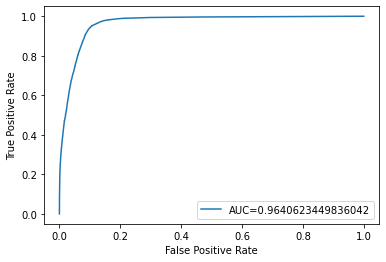

In [22]:
from sklearn import metrics

y_pred_proba = rf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [23]:
len(data)

79294

In [24]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=400,criterion='entropy', max_features = 'sqrt').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RFEntropymaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                        model  accuracy       MSE
0                RandomForest  0.911572  0.088428
1     RandomForestDateandTime  0.543483  0.456517
2        RandomForestLocation  0.687550  0.312450
3       RandomForestWKohtLiik  0.919038  0.080962
4     RandomForestWKahjuSumma  0.921661  0.078339
5   RandomForestWOSyndmusLiik  0.679580  0.320420
6                DecisionTree  0.886602  0.113398
7         DecisionTreeEntropy  0.888115  0.111885
8                DecisionTree  0.764730  0.235270
9                DecisionTree  0.764730  0.235270
10                  RFEntropy  0.922215  0.077785
11       RFEntropymaxfeatures  0.922316  0.077684


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/1681962582.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RFEntropymaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [26]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=400,criterion='log_loss', max_features = 'sqrt').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RFloglossmaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                        model  accuracy       MSE
0                RandomForest  0.911572  0.088428
1     RandomForestDateandTime  0.543483  0.456517
2        RandomForestLocation  0.687550  0.312450
3       RandomForestWKohtLiik  0.919038  0.080962
4     RandomForestWKahjuSumma  0.921661  0.078339
5   RandomForestWOSyndmusLiik  0.679580  0.320420
6                DecisionTree  0.886602  0.113398
7         DecisionTreeEntropy  0.888115  0.111885
8                DecisionTree  0.764730  0.235270
9                DecisionTree  0.764730  0.235270
10                  RFEntropy  0.922215  0.077785
11       RFEntropymaxfeatures  0.922316  0.077684
12       RFloglossmaxfeatures  0.922468  0.077532


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/203135510.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RFloglossmaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [27]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=400,criterion='log_loss', max_features = 'log2').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RFloglossmaxfeaturelog2', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                        model  accuracy       MSE
0                RandomForest  0.911572  0.088428
1     RandomForestDateandTime  0.543483  0.456517
2        RandomForestLocation  0.687550  0.312450
3       RandomForestWKohtLiik  0.919038  0.080962
4     RandomForestWKahjuSumma  0.921661  0.078339
5   RandomForestWOSyndmusLiik  0.679580  0.320420
6                DecisionTree  0.886602  0.113398
7         DecisionTreeEntropy  0.888115  0.111885
8                DecisionTree  0.764730  0.235270
9                DecisionTree  0.764730  0.235270
10                  RFEntropy  0.922215  0.077785
11       RFEntropymaxfeatures  0.922316  0.077684
12       RFloglossmaxfeatures  0.922468  0.077532
13    RFloglossmaxfeaturelog2  0.922014  0.077986


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/4079558271.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RFloglossmaxfeaturelog2', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [31]:
# Amazingly slow and bad, do not recommend
# from sklearn.svm import SVC
# datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
# datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
# data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# # data_dum.head()
# labels = data_dum2.SyyteoLiik
# features = data_dum2.drop('SyyteoLiik', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

# rf2 = SVC().fit(X_train, y_train)
# rf2.fit(X_train, y_train)
# acc = accuracy_score(y_test, rf2.predict(X_test))
# mse = MSE(y_test, rf2.predict(X_test))
# results_df = results_df.append({'model': 'SVC', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
# print(results_df)

In [32]:
datam2 = data.drop(["ToimKpv", "KohtNimetus","Lest_X", "Lest_Y" ], axis = 1)
datam2.SyyteoLiik = data.SyyteoLiik.map(dict(KT=1, VT=0))
data_dum2 = pd.get_dummies(datam2, columns =  ['ToimNadalapaev', 'MaakondNimetus', 'ValdLinnNimetus', "KohtLiik","Kahjusumma", 'SyndmusLiik'])
# data_dum.head()
labels = data_dum2.SyyteoLiik
features = data_dum2.drop('SyyteoLiik', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state=1)

rf2 = RandomForestClassifier(n_estimators=300,criterion='log_loss', max_features = 'sqrt').fit(X_train, y_train)
rf2.fit(X_train, y_train)
acc = accuracy_score(y_test, rf2.predict(X_test))
mse = MSE(y_test, rf2.predict(X_test))
results_df = results_df.append({'model': 'RFloglossmaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)
print(results_df)

                        model  accuracy       MSE
0                RandomForest  0.911572  0.088428
1     RandomForestDateandTime  0.543483  0.456517
2        RandomForestLocation  0.687550  0.312450
3       RandomForestWKohtLiik  0.919038  0.080962
4     RandomForestWKahjuSumma  0.921661  0.078339
5   RandomForestWOSyndmusLiik  0.679580  0.320420
6                DecisionTree  0.886602  0.113398
7         DecisionTreeEntropy  0.888115  0.111885
8                DecisionTree  0.764730  0.235270
9                DecisionTree  0.764730  0.235270
10                  RFEntropy  0.922215  0.077785
11       RFEntropymaxfeatures  0.922316  0.077684
12       RFloglossmaxfeatures  0.922468  0.077532
13    RFloglossmaxfeaturelog2  0.922014  0.077986
14         logisticregression  0.878834  0.121166
15                        SVC  0.522195  0.477805
16       RFloglossmaxfeatures  0.922417  0.077583


/var/folders/dy/p_hwdm556d3d4y6m5yh6xcjh0000gn/T/ipykernel_1784/896448935.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': 'RFloglossmaxfeatures', 'accuracy': acc, 'MSE':mse}, ignore_index=True)


In [2]:
fig = plt.figure(figsize=[12, 8])
plt.hist(data["ToimKell"])
plt.xticks(rotation="vertical")
plt.show()

NameError: name 'plt' is not defined

In [43]:
data.groupby(['ToimKell']).size()

ToimKell
0     3594
1     1781
2     1638
3     1419
4     1112
5      810
6      620
7      807
8     1740
9     2241
10    3295
11    3868
12    4651
13    4678
14    5045
15    5302
16    5329
17    5721
18    5672
19    5402
20    4948
21    4281
22    2901
23    2439
dtype: int64

In [1]:
y_pred_proba = rf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: name 'rf2' is not defined